In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("car_price.csv") 

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.drop("name",axis=1,inplace=True)

In [5]:
df["car_age"] = 2025 - df["year"]
df.drop("year",axis=1,inplace=True)

In [6]:
df_label = pd.get_dummies(df,drop_first=True)

In [7]:
df_label

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,18,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,18,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,13,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,8,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,11,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,11,True,False,False,False,True,False,True,False,True,False,False
4336,409999,80000,11,True,False,False,False,True,False,True,False,True,False,False
4337,110000,83000,16,False,False,False,True,True,False,True,False,True,False,False
4338,865000,90000,9,True,False,False,False,True,False,True,False,False,False,False


In [8]:
df_encoder =df_label.astype(int)
df_encoder

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,18,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,18,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,13,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,8,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,11,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,11,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,11,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,16,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,9,1,0,0,0,1,0,1,0,0,0,0


In [9]:
X = df_encoder.drop("selling_price",axis=1)
y = df_encoder["selling_price"]
y = np.log(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.3600705575702805
MSE: 0.2269178877349087
R2 Score: 0.6709634811511777


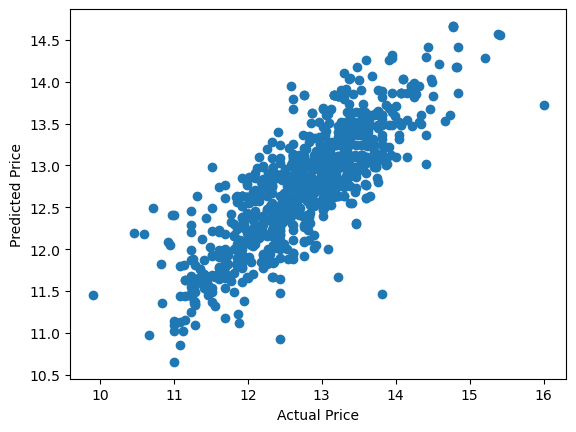

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()
